# Setup

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools as it

import helpers_03

%matplotlib inline

# Neurons as Logic Gates

As an introduction to neural networks and their component neurons, we are going to look at using neurons to implement the most primitive logic computations:  logic gates.  Let's go!

##### The Sigmoid Function

The basic, classic activation function that we apply to neurons is a  sigmoid (sometimes just called *the* sigmoid function) function:  the standard logistic function.

$$
\sigma = \frac{1}{1 + e^{-x}}
$$

$\sigma$ ranges from (0, 1). When the input $x$ is negative, $\sigma$ is close to 0. When $x$ is positive, $\sigma$ is close to 1. At $x=0$, $\sigma=0.5$

We can implement this conveniently with NumPy.

In [2]:
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

And plot it with matplotlib.

(-0.1, 1.15)

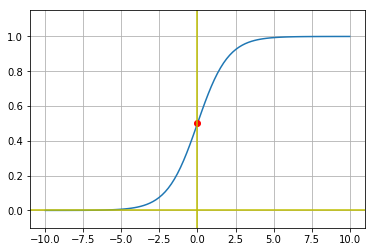

In [3]:
# Plot The sigmoid function
xs = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(xs)

fig = plt.figure(figsize=(6,4))
plt.plot(xs, activation)
plt.plot(0,.5,'ro')

plt.grid(True, which='both')
plt.axhline(y=0, color='y')
plt.axvline(x=0, color='y')
plt.ylim([-0.1, 1.15])

## An Example with OR

##### OR Logic
A logic gate takes in two boolean (true/false or 1/0) inputs, and returns either a 0 or 1 depending on its rule. The truth table for a logic gate shows the outputs for each combination of inputs: (0, 0), (0, 1), (1,0), and (1, 1). For example, let's look at the truth table for an Or-gate:

<table>
<tr><th colspan="3">OR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

##### OR as a Neuron

A neuron that uses the sigmoid activation function outputs a value between (0, 1). This naturally leads us to think about boolean values. Imagine a neuron that takes in two inputs, $x_1$ and $x_2$, and a bias term:

<img src="./images/logic01.png" width=50%/>

By limiting the inputs of $x_1$ and $x_2$ to be in $\left\{0, 1\right\}$, we can simulate the effect of logic gates with our neuron. The goal is to find the weights (represented by ? marks above), such that it returns an output close to 0 or 1 depending on the inputs.  What weights should we use to output the same results as OR? Remember: $\sigma(z)$ is close to 0 when $z$ is largely negative (around -10 or less), and is close to 1 when $z$ is largely positive (around +10 or greater).

$$
z = w_1 x_1 + w_2 x_2 + b
$$

Let's think this through:

* When $x_1$ and $x_2$ are both 0, the only value affecting $z$ is $b$. Because we want the result for input (0, 0) to be close to zero, $b$ should be negative (at least -10) to get the very left-hand part of the sigmoid.
* If either $x_1$ or $x_2$ is 1, we want the output to be close to 1. That means the weights associated with $x_1$ and $x_2$ should be enough to offset $b$ to the point of causing $z$ to be at least 10 (i.e., to the far right part of the sigmoid).

Let's give $b$ a value of -10. How big do we need $w_1$ and $w_2$ to be?  At least +20 will get us to +10 for just one of $\{w_1, w_2\}$ being on.

So let's try out $w_1=20$, $w_2=20$, and $b=-10$:

<img src="./images/logic02.png\" width=50%/>

##### Some Utility Functions
Since we're going to be making several example logic gates (from different sets of weights and biases), here are two helpers.  The first takes our weights and baises and turns them into a two-argument function that we can use like `and(a,b)`.  The second is for printing a truth table for a gate.

In [4]:
def logic_gate(w1, w2, b):
    ''' logic_gate is a function which returns a function
        the returned function take two args and (hopefully)
        acts like a logic gate (and/or/not/etc.).  its behavior
        is determined by w1,w2,b.  a longer, better name would be
        make_twoarg_logic_gate_function'''
    def the_gate(x1, x2):
        return sigmoid(w1 * x1 + w2 * x2 + b)
    return the_gate

def test(gate):
    'Helper function to test out our weight functions.'
    for a, b in it.product(range(2), repeat=2):
        print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

Let's see how we did.  Here's the gold-standard truth table.

<table>
<tr><th colspan="3">OR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

And our result:

In [5]:
or_gate = logic_gate(20, 20, -10)
test(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


This matches - great! 

# Exercise 1

##### Part 1:  AND Gate

Now you try finding the appropriate weight values for each truth table. Try not to guess and check. Think through it logically and try to derive values that work.

<table>
<tr><th colspan="3">AND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>0</td></tr>
<tr><td>1</td><td>0</td><td>0</td></tr>
<tr><td>1</td><td>1</td><td>1</td></tr>
</table>

In [6]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# and_gate = logic_gate()
# test(and_gate)

##### Part 2: NOR (Not Or) Gate
<table>
<tr><th colspan="3">NOR gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>1</td><td>0</td></tr>
<tr><td>1</td><td>0</td><td>0</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>
<table>

In [7]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# nor_gate = logic_gate()
# test(nor_gate)

##### Part 3: NAND (Not And) Gate
<table>
<tr><th colspan="3">NAND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>1</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>

In [8]:
# Fill in the w1, w2, and b parameters such that the truth table matches
# nand_gate = logic_gate()
# test(nand_gate)

## Solutions 1

# Limits of Single Neurons

If you've taken computer science courses, you may know that the XOR gates are the basis of computation. They can be used as half-adders, the foundation of being able to add numbers together. Here's the truth table for XOR:

##### XOR (Exclusive Or) Gate
<table>
<tr><th colspan="3">NAND gate truth table</th></tr>
<tr><th colspan="2">Input</th><th>Output</th></tr>
<tr><td>0</td><td>0</td><td>0</td></tr>
<tr><td>0</td><td>1</td><td>1</td></tr>
<tr><td>1</td><td>0</td><td>1</td></tr>
<tr><td>1</td><td>1</td><td>0</td></tr>
</table>

Now the question is, can you create a set of weights such that a single neuron can output this property?  It turns out that you cannot. Single neurons can't correlate inputs, so it's just confused. So individual neurons are out. Can we still use neurons to somehow form an XOR gate?

What if we tried something more complex:

<img src="./images/logic03.png\" width=60%/>

Here, we've got the inputs going to two separate gates: the top neuron is an OR gate, and the bottom is a NAND gate. The output of these gates is passed to another neuron, which is an AND gate. If you work out the outputs at each combination of input values, you'll see that this is an XOR gate!

In [9]:
# Make sure you have or_gate, nand_gate, and and_gate working from above
def xor_gate(a, b):
    c = or_gate(a, b)
    d = nand_gate(a, b)
    return and_gate(c, d)
test(xor_gate)

NameError: name 'nand_gate' is not defined

Thus, we can see how chaining together neurons can compose more complex models than we'd otherwise have access to.

# Learning a Logic Gate

We can use TensorFlow to try and teach a model to learn the correct weights and bias by passing in our truth table as training data.

In [ ]:
# Create an empty Graph to place our operations in
logic_graph = tf.Graph()
with logic_graph.as_default():
    # Placeholder inputs for our a, b, and label training data
    x1 = tf.placeholder(tf.float32)
    x2 = tf.placeholder(tf.float32)
    label = tf.placeholder(tf.float32)
    
    # A placeholder for our learning rate, so we can adjust it
    learning_rate = tf.placeholder(tf.float32)
    
    # The Variables we'd like to learn: weights for a and b, as well as a bias term
    w1 = tf.Variable(tf.random_normal([]))
    w2 = tf.Variable(tf.random_normal([]))
    b = tf.Variable(0.0, dtype=tf.float32)
    
    # Use the built-in sigmoid function for our output value
    output = tf.nn.sigmoid(w1 * x1 + w2 * x2 + b)
    
    # We'll use the mean of squared errors as our loss function 
    loss = tf.reduce_mean(tf.square(output - label))
    correct = tf.equal(tf.round(output), label)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
    # Finally, we create a gradient descent training operation and an initialization operation
    train = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    init = tf.global_variables_initializer()

In [ ]:
with tf.Session(graph=logic_graph) as sess:
    sess.run(init)
    # Training data for all combinations of inputs
    and_table = np.array([[0,0,0],
                          [1,0,0],
                          [0,1,0],
                          [1,1,1]])
    
    feed_dict={x1:    and_table[:,0],
               x2:    and_table[:,1],
               label: and_table[:,2], 
               learning_rate: 0.5}
    
    for i in range(5000):
        l, acc, _ = sess.run([loss, accuracy, train], feed_dict)
        if i % 1000 == 0:
            print('loss: {}\taccuracy: {}'.format(l, acc))
            
    test_dict = {x1: and_table[:,0], #[0.0, 1.0, 0.0, 1.0], 
                 x2: and_table[:,1]} # [0.0, 0.0, 1.0, 1.0]}
    w1_val, w2_val, b_val, out = sess.run([w1, w2, b, output], test_dict)
    print('\nLearned weight for w1:\t {}'.format(w1_val))
    print('Learned weight for w2:\t {}'.format(w2_val))
    print('Learned weight for bias: {}\n'.format(b_val))

    print(np.column_stack((and_table[:,[0,1]], out.round().astype(np.uint8) ) ) )
    # FIXME!  ARGH!  use real python or numpy
    #idx = 0
    #for i in [0, 1]:
    #    for j in [0, 1]:
    #        print('{}, {}: {}'.format(i, j, np.round(out[idx])))
    #        idx += 1
    

# Exercise 2

You may recall that in week 2, we built a class `class TF_GD_LinearRegression` that wrapped up the three steps of using a learning model:  (1) build the model graph, (2) train/fit, and (3) test/predict.  Above, we *did not* use that style of implementation.  And you can see that things get a bit messy, quickly.  We have model creation in one spot and then we have training, testing, and output all mixed together (along with TensorFlow helper code like sessions, etc.).  We can do better.  Rework the code above into a class like `TF_GD_LinearRegression`.

## Solution 2

# Learning an XOR Gate

If we compose a two stage model, we can learn the XOR gate.  You'll notice that defining the model itself is starting to get messy.  We'll talk about ways of dealing with that next week.

In [ ]:
class XOR_Graph:
    def __init__(self):
        # Create an empty Graph to place our operations in
        xor_graph = tf.Graph()
        with xor_graph.as_default():
            # Placeholder inputs for our a, b, and label training data
            self.x1 = tf.placeholder(tf.float32)
            self.x2 = tf.placeholder(tf.float32)
            self.label = tf.placeholder(tf.float32)

            # A placeholder for our learning rate, so we can adjust it
            self.learning_rate = tf.placeholder(tf.float32)

            # abbreviations!  this section is the difference
            # from the LogicGate class above
            Var = tf.Variable; rn = tf.random_normal
            self.weights = [[Var(rn([])), Var(rn([]))],
                            [Var(rn([])), Var(rn([]))],
                            [Var(rn([])), Var(rn([]))]]
            self.biases = [Var(0.0, dtype=tf.float32),
                           Var(0.0, dtype=tf.float32),
                           Var(0.0, dtype=tf.float32)]
            sig1 = tf.nn.sigmoid(self.x1 * self.weights[0][0] + 
                                 self.x2 * self.weights[0][1] + 
                                 self.biases[0])
            sig2 = tf.nn.sigmoid(self.x1 * self.weights[1][0] + 
                                 self.x2 * self.weights[1][1] + 
                                 self.biases[1])
            self.output = tf.nn.sigmoid(sig1 * self.weights[2][0] + 
                                        sig2 * self.weights[2][1] + 
                                        self.biases[2])

            # We'll use the mean of squared errors as our loss function 
            self.loss = tf.reduce_mean(tf.square(self.output - self.label))
            
            # Finally, we create a gradient descent training operation 
            # and an initialization operation
            gdo = tf.train.GradientDescentOptimizer
            self.train = gdo(self.learning_rate).minimize(self.loss)
            
            correct = tf.equal(tf.round(self.output), self.label)
            self.accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        
            init = tf.global_variables_initializer()
        
        self.sess = tf.Session(graph=xor_graph)
        self.sess.run(init)        

    def fit(self, train_dict):
        loss, acc, _ = self.sess.run([self.loss, self.accuracy, self.train], 
                                     train_dict)
        return loss, acc
        
    def predict(self, test_dict):
        # make a list of organized weights:  
        # see tf.get_collection for more advanced ways to handle this
        all_trained = (self.weights[0] + [self.biases[0]] +
                       self.weights[1] + [self.biases[1]] +
                       self.weights[2] + [self.biases[2]])
        return self.sess.run(all_trained + [self.output], test_dict)

In [ ]:
xor_table = np.array([[0,0,0],
                      [1,0,1],
                      [0,1,1],
                      [1,1,0]])

logic_model = XOR_Graph()
train_dict={logic_model.x1:    xor_table[:,0],
            logic_model.x2:    xor_table[:,1],
            logic_model.label: xor_table[:,2], 
            
            logic_model.learning_rate: 0.5}

print("training")
# note, I might get stuck in a local minima b/c this is a 
# small problem with no noise (yes, noise helps!)
# this can converge in one round of 1000 or it might get 
# stuck for all 10000
for i in range(10000):
    loss, acc = logic_model.fit(train_dict)
    if i % 1000 == 0:
        print('loss: {}\taccuracy: {}'.format(loss, acc))
print('loss: {}\taccuracy: {}'.format(loss, acc))
            
print("testing")
test_dict = {logic_model.x1: xor_table[:,0], 
             logic_model.x2: xor_table[:,1]}
results = logic_model.predict(test_dict)
wb_lrn, predictions = results[:-1], results[-1]

print(wb_lrn)
wb_lrn = np.array(wb_lrn).reshape(3,3)

# combine the predictions with the inputs and clean up the data
# round it and convert to unsigned 8 bit ints
out_table = np.column_stack((xor_table[:,[0,1]], 
                             predictions)).round().astype(np.uint8)

print("results")
print('Learned weights/bias (L1):', wb_lrn[0])
print('Learned weights/bias (L2):', wb_lrn[1])
print('Learned weights/bias (L3):', wb_lrn[2])
print('Testing Table:')
print(out_table)
print("Correct?", np.allclose(xor_table, out_table))

# An Example Neural Network

So, now that we've worked with some primitive models, let's take a look at something a bit closer to what we'll work with moving forward:  an actual neural network.

The following model accepts a 100 dimensional input, has a hidden layer depth of 300, and an output layer depth of 50. We use a sigmoid activation function for the hidden layer.

In [ ]:
nn1_graph = tf.Graph()
with nn1_graph.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 100])
    y = tf.placeholder(tf.float32, shape=[None])  # Labels, not used in this model
    
    with tf.name_scope('hidden1'):
        w = tf.Variable(tf.truncated_normal([100, 300]), name='W')
        b = tf.Variable(tf.zeros([300]), name='b')
        z = tf.matmul(x, w) + b
        a = tf.nn.sigmoid(z)
    
    with tf.name_scope('output'):
        w = tf.Variable(tf.truncated_normal([300, 50]), name='W')
        b = tf.Variable(tf.zeros([50]), name='b')
        z = tf.matmul(a, w) + b
        output = z
    
    with tf.name_scope('global_step'):
        global_step = tf.Variable(0, trainable=False, name='global_step')
        inc_step = tf.assign_add(global_step, 1, name='increment_step')
    
    with tf.name_scope('summaries'):
        for var in tf.trainable_variables():
            hist_summary = tf.summary.histogram(var.op.name, var)
        summary_op = tf.summary.merge_all()
    
    init = tf.global_variables_initializer()

In [ ]:
tb_base_path = 'tbout/nn1_graph'
tb_path = helpers_03.get_fresh_dir(tb_base_path)
sess = tf.Session(graph=nn1_graph)
writer = tf.summary.FileWriter(tb_path, graph=nn1_graph)
sess.run(init)
summaries = sess.run(summary_op)
writer.add_summary(summaries)
writer.close()
sess.close()

# Exercise 3

Modify the template above to create your own neural network with the following features:

* Accepts input of length 200 (and allows for variable number of examples)
* First hidden layer depth of 800
* Second hidden layer depth of 600
* Third hidden layer depth of 400
* Output layer depth of 100
* Include histogram summaries of the variables

## Solution 3